In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor


df = pd.read_csv('../data/raw/Furniture.csv')

In [53]:
df.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   cost                 2500 non-null   float64
 2   sales                2500 non-null   int64  
 3   profit_margin        2500 non-null   float64
 4   inventory            2500 non-null   int64  
 5   discount_percentage  2500 non-null   float64
 6   delivery_days        2500 non-null   int64  
 7   category             2500 non-null   object 
 8   material             2500 non-null   object 
 9   color                2500 non-null   object 
 10  location             2500 non-null   object 
 11  season               2500 non-null   object 
 12  store_type           2500 non-null   object 
 13  brand                2500 non-null   object 
 14  revenue              2500 non-null   float64
dtypes: float64(5), int64(3), object(7)
mem

In [55]:
df.describe()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000
mean,274.495219,191.930107,24.924000,30.208571,97.715600,14.947616,4.89400,5926.853657
std,130.898452,98.590751,14.050067,11.536804,57.616228,8.621547,2.55902,6902.737604
min,50.704297,26.505895,1.000000,10.017692,0.000000,0.005556,1.00000,-14214.565505
25%,159.104890,106.399135,13.000000,20.230697,50.000000,7.760214,3.00000,1216.719195
50%,277.641809,189.336329,25.000000,30.297911,94.000000,14.915143,5.00000,5523.232714
75%,387.378046,263.188280,37.000000,40.134205,147.000000,22.292661,7.00000,10233.537982
max,499.872953,447.022911,49.000000,49.999535,199.000000,29.991229,9.00000,32922.078832


In [56]:
df.isnull().sum()

price                  0
cost                   0
sales                  0
profit_margin          0
inventory              0
discount_percentage    0
delivery_days          0
category               0
material               0
color                  0
location               0
season                 0
store_type             0
brand                  0
revenue                0
dtype: int64

In [57]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('revenue')

print(f"\nNumerical columns ({len(numeric_cols)}): {numeric_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}\n")


Numerical columns (7): ['price', 'cost', 'sales', 'profit_margin', 'inventory', 'discount_percentage', 'delivery_days']
Categorical columns (7): ['category', 'material', 'color', 'location', 'season', 'store_type', 'brand']



In [58]:
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

category: 5 unique values
material: 5 unique values
color: 6 unique values
location: 3 unique values
season: 4 unique values
store_type: 2 unique values
brand: 4 unique values


In [59]:
X = df.drop(['revenue'], axis=1)
y = df['revenue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Shape Train: {X_train.shape}")
print(f"Shape Test: {X_test.shape}")

preprocessor_lr = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

lr_model = Pipeline([
    ('preprocessor', preprocessor_lr),
    ('regressor', LinearRegression())
])

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("=== Linear Regression ===")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print()


Shape Train: (2000, 14)
Shape Test: (500, 14)
=== Linear Regression ===
R²: 0.3967536765851888
MAE: 4480.566792396966
RMSE: 5626.312019065032



Shape Train: (2000, 14)
Shape Test: (500, 14)
Fitting 3 folds for each of 243 candidates, totalling 729 fits
=== XGBoost Regressor ===
R²: 0.4407451364300319
MAE: 4360.051092784171
RMSE: 5417.280908986617



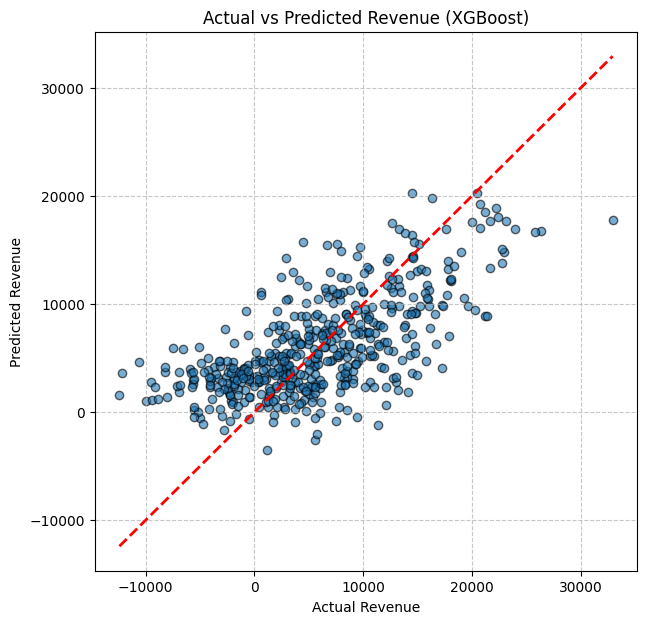

In [60]:
from sklearn.model_selection import GridSearchCV

preprocessor_xgb = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor_xgb),
    ('regressor', XGBRegressor(
        random_state=42,
        n_jobs=-1,
        objective='reg:squarederror'
    ))
])

print(f"Shape Train: {X_train.shape}")
print(f"Shape Test: {X_test.shape}")

param_grid = {
    'regressor__n_estimators': [200, 500, 800],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 5, 7],
    'regressor__subsample': [0.7, 0.8, 1.0],
    'regressor__colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

y_pred_xgb = grid_search.predict(X_test)

print("=== XGBoost Regressor ===")
print("R²:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print()

import matplotlib.pyplot as plt

# --- Gráfico de dispersión: valores reales vs predichos ---
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)

plt.title('Actual vs Predicted Revenue (XGBoost)')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Epoch [20/600], Loss: 81230528.0000
Epoch [40/600], Loss: 76175496.0000
Epoch [60/600], Loss: 54257416.0000
Epoch [80/600], Loss: 41077904.0000
Epoch [100/600], Loss: 39360980.0000
Epoch [120/600], Loss: 38856100.0000
Epoch [140/600], Loss: 38521924.0000
Epoch [160/600], Loss: 38195960.0000
Epoch [180/600], Loss: 37851324.0000
Epoch [200/600], Loss: 37472240.0000
Epoch [220/600], Loss: 37003064.0000
Epoch [240/600], Loss: 36457664.0000
Epoch [260/600], Loss: 35813048.0000
Epoch [280/600], Loss: 35043724.0000
Epoch [300/600], Loss: 34102452.0000
Epoch [320/600], Loss: 32943178.0000
Epoch [340/600], Loss: 31557644.0000
Epoch [360/600], Loss: 30034520.0000
Epoch [380/600], Loss: 28729966.0000
Epoch [400/600], Loss: 27911074.0000
Epoch [420/600], Loss: 27457418.0000
Epoch [440/600], Loss: 27131746.0000
Epoch [460/600], Loss: 26871248.0000
Epoch [480/600], Loss: 26637076.0000
Epoch [500/600], Loss: 26421672.0000
Epoch [520/600], Loss: 26219480.0000
Epoch [540/600], Loss: 26024806.0000
Epoch

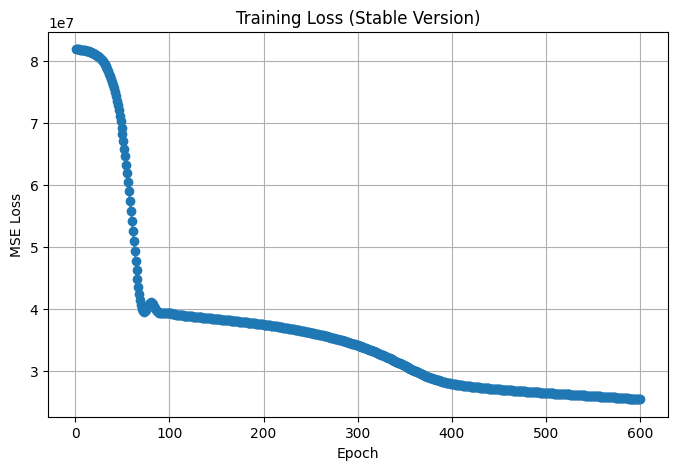


Training metrics:
  MSE:  25396644.16
  R²:   0.4528
  MAE:  4021.61
  MAPE: 230.41%

Test metrics:
  MSE:  28591223.67
  R²:   0.4551
  MAE:  4330.10
  MAPE: 485.78%


In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
import numpy as np

# --- Preparación de datos ---
X = df.drop(['revenue'], axis=1)
y = df['revenue'].values.reshape(-1, 1)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        #('num', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

input_dim = X_train.shape[1]

class RevenueNN(nn.Module):
    def __init__(self, input_dim):
        super(RevenueNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        return self.fc5(x)

model = RevenueNN(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

epochs = 600
train_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_losses, marker='o')
plt.title('Training Loss (Stable Version)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_t)
    y_pred_test = model(X_test_t)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("\nTraining metrics:")
print(f"  MSE:  {mse_train:.2f}")
print(f"  R²:   {r2_train:.4f}")
print(f"  MAE:  {mae_train:.2f}")
print(f"  MAPE: {mape_train*100:.2f}%")

print("\nTest metrics:")
print(f"  MSE:  {mse_test:.2f}")
print(f"  R²:   {r2_test:.4f}")
print(f"  MAE:  {mae_test:.2f}")
print(f"  MAPE: {mape_test*100:.2f}%")
